In [1]:
from pylab import *

## Backstory
Året er 2020. Vi befinner oss i Alexandria - menneskehetens siste fristed. Alexandria ligger opprinnelig i USA, men grunnet opphavsrett befinner Alexandria seg nå i Finnmark. 500 mennekser har til nå funnet friheten bak Alexandrias vegger. Disse menneskene er overnaturlige Bear Grylls-imitatorer, med andre ord er de 100% trygge for Zombier og dermed er Alexandrias bæreevne ubegrenset. Dette betyr at populasjonen blir kun påvirket av fødsel og innvandring.
I modellen nedenfor ser du utviklingen av populasjonen i Alexandria over en lengre tidsperiode, der populasjonen kun påvirkes av fødsel og innvandring. Vi har valgt at innvandringsvariablen er større enn fødselsvariablen ettersom det under en zombie-apokalypse er mer sannsynlig at befolkningen øker som følge av at nye folk kommer til byen enn at barn blir født.

Metoden vi for å beregne populasjonen, er Eulers metode. Den går i hovedsak ut på å regne ut antallet i neste populasjon, ved å bruke antallet fra forrige måling og den deriverte av populasjonen (hvor mye den vokser). Dette regnes ut i en løkk N ganger.

Målet vårt er å lage en mest mulig realistisk modell for zombie og menneskepopulasjoner under en zombieapokalypse, og samtidig få både zombiene og menneskene til å overleve lengst mulig (Slik at the Walking Dead aldri går tom for sesonger å melke).

In [2]:
"Variabler"
F=0.001            #Fødsel
I=0.05             #Innvandring
POP=500            #Populasjon etter 0 uker
TID= 208           #i uker 
N=1000             #antall ganger populasjonen måles over tid^
dt=TID/N           #Tidsteg mellom hver måling i uker
teittingtang=0

In [3]:
"Matriser"
pop=zeros(N)        #Lager matrise for populasjonen
popder=zeros(N)     #Lager matrise for den deriverte av populasjonen
tid=zeros(N)        #Lager matrise for tid

"Initialbetingelser for matriser"
pop[0]=POP        #Setter første populasjonsmåling til det start-populasjonen er
tid[0]=0          #Første måling skjer ved tid = 0 uker

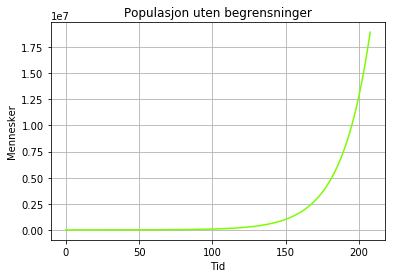

In [4]:
#Bruker Eulers metode for å finne populasjonen over TID måneder:
for i in range(N-1):                  #Kjører løkken N ganger
    popder[i]=pop[i]*F + pop[i]*I     #Regner ut endringen i populasjonen fra fødsel + innvandring
    pop[i+1]=pop[i]+popder[i]*dt      #Regner så ut populasjonen for neste måling
    tid[i+1]=tid[i]+dt                
    
    
#Plotter populasjonen i Alexandria:
plot(tid,pop,color='lawngreen')            #Med litt hage farger
title('Populasjon uten begrensninger')
ylabel('Mennesker')                      #Navn på y-aksen
xlabel('Tid')                            #Navn på x-aksen 
grid()                                   #Har med rutenett
show()    

Populasjonen øker eksponentielt, og møter aldri noen hindringer. Dersom dette fortsetter ville populasjonen i Alexandria bli stor nok til å lage en egen planet bestående av Alexandrias innbyggere (Se bilde under). Denne modellen er ikke realistisk ettersom mennesker ikke lever evig, ressurser går tomt etterhvert, zombier dreper mennesker osv.


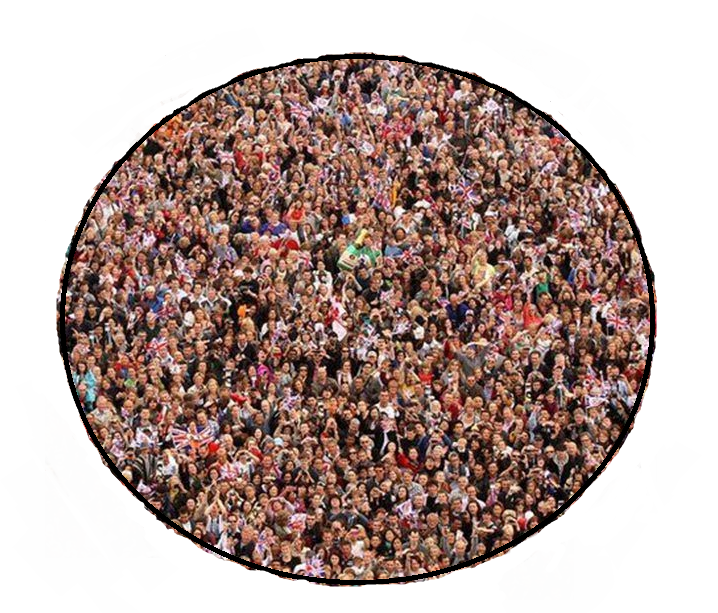

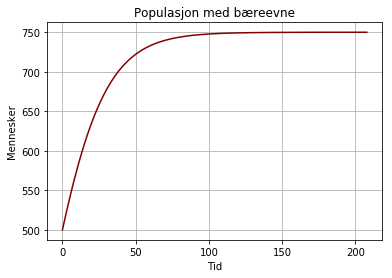

In [5]:
B = 750         #Bæreevnen til Alexandria

#Setter inn initialbetingelsene igjen
pop[0] = POP        
tid[0] = 0

#Kjører Eulers metode en gang til, men denne gangen med bæreevne. 
for i in range(N-1):
    popder[i]=(pop[i]*F + pop[i]*I)*(1-pop[i]/B)
    pop[i+1]=pop[i]+popder[i]*dt
    tid[i+1]=tid[i]+dt

#plotter den nye grafen
plot(tid,pop,color="maroon")        #Bruker en ny spennende fargekode
title("Populasjon med bæreevne")
ylabel("Mennesker")
xlabel("Tid")
grid()
show()


Grafen over viser hvordan populasjonen i Alexandria forandrer seg over tid, og denne gangen har vi tatt med bæreevne. Vi satt bæreevnen til 750 personer, ettersom vi tenker at en by i Finnmark (under en zombie apokalypse) vil kun ha rom og ressurser til rundt 750 personer. Faktorer som kan være med på å påvirke bæreevnen til Alexandria vil være tilgang til ressurser og rom. 
Vi har brukt Eulers metode på samme måte som tidligere, men den deriverte av populasjonen blir multiplisert med (1-pop[i]/B). Dette betyr at dersom populasjonen er mindre enn bæreevne, øker den. Dersom populasjonen er større enn bæreevnen vil populasjonen synke. 


For en populasjon er det naturlig at noen dør, selv når det ikke er en zombieapokalypse. Ettersom Alexandria ligger i Finnmark antar vi at denne naturlige dødsraten vil være større under vinteren, når man enklere kan bli syk og sykdommen kan få større konsekvenser enn på sommeren + at muligens vil zombiene kunne gjemme seg i snøen for intet annende mennesker.

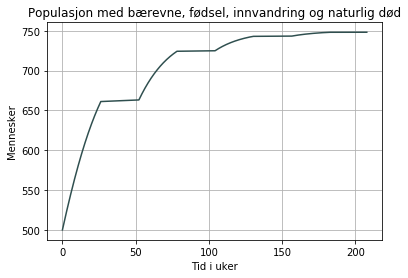

In [6]:
ND_S = 0.001  #Naturlig dødsrate under sommeren
sesong = 26 #Et halvt år i antall uker
etår = 52  #ett år i uker
NightKing = 50  #Hvor mye dødligere vinteren er for befolkningen i Alexandria

#Resetter intialbetingelsene igjen
pop[0] = POP
tid[0] = 0

for i in range(N-1):
    if tid[i] < sesong and tid[i] >= (sesong-26):  #Dersom det er sommer, starter alltid året med sommer for å øke overlevelsessjansene
        ND = 0.001
        etår = 52
    else:
        ND = ND_S*NightKing           #Dersom det ikke er sommer (vinter) øker den naturlige døden betraktelig
        sesong += etår                #Endrer det slik at det til slutt kommer en sommer etter vinteren
        etår = 0                      #slik at neste sommer ikke "stikker av" fra Alexandria
    #Så eulers igjen:
    popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B)
    pop[i+1]=pop[i]+popder[i]*dt
    tid[i+1]=tid[i]+dt
   
plot(tid, pop, color='darkslategrey')
title('Populasjon med bærevne, fødsel, innvandring og naturlig død')
ylabel('Mennesker')
xlabel('Tid i uker')
grid()
show()

Her kan man se at populasjonen øker mye det første halvåret, får de nesten treffer en mur. Her er den naturlige dødsraten 50 ganger så stor som på sommeren. Grunnen til at vi økte den såpass mye, var for å se en tydelig endring på grafen. Et mer realistisk tall for NightKing vil nok være et mindre tall. 

Akkurat nå er det egentlig kun en veldig viktig variabel vi mangler i zombieapokalypsen vår; Nemlig zombiene! Derfor legger vi dem inn nå!

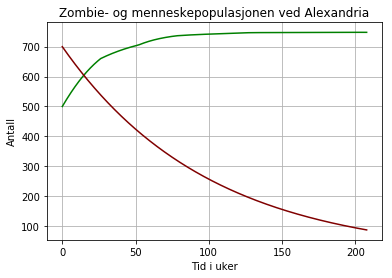

In [7]:
#Initialbetingelser for zombier
ZD = 0.0001              #rate for møte mellom menneske og zombie, hvor zombie dreper menneske
Z = 700               #Zombiepopulasjon etter 0 uker
RÅ = 0.01             #Råtningsraten for zombier
NightKing = 20

#Oppretter matriser for zombiepopulasjonen og den deriverte av zombiepopulasjonen
zpop = zeros(N)     #Matrise med 0-er for zombie populasjonen
zder = zeros(N)       #Deriverte av zombiepopulasjonen

#Initialbetingelser 
zpop[0] = Z            
tid[0] = 0
sesong = 26
pop[0] = POP

for i in range(N-1):
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
    else:
        ND = ND_S*NightKing
        sesong += etår
        etår = 0
    popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - pop[i]*ZD  #Trekker fra antallet som blir drept av zombier
    pop[i+1]=pop[i]+popder[i]*dt
    tid[i+1]=tid[i]+dt
    zder[i]=-zpop[i]*RÅ                    #Her er endringen i antall zombier lik zpop * råtningsraten
    zpop[i+1]=zpop[i]+zder[i]*dt           #Zombiepopulasjonen er da lik populasjonen pluss endringen

plot(tid,pop,color="green")
plot(tid,zpop,color="maroon")
title("Zombie- og menneskepopulasjonen ved Alexandria")
ylabel("Antall")
xlabel("Tid i uker")
grid()
show()

(NightKing variabelen er justert ned, ettersom den var for kraftig i forrige forsøk.)

Vi ser at zombie populasjonen synker prosentvis nedover. Grunnen til dette er at råtnings-raten er det eneste som påvirker dem. Altså er zombiene i denne modellen dømt til å dø ut sakte, men sikkert i en bue. 

Akkurat nå så kommer det ingen nye zombier, selv om de dreper mennesker. Derfor lager vi et nytt program, hvor en prosentandel av drepte mennesker vil bli til nye zombier, noe som er mer realistisk.

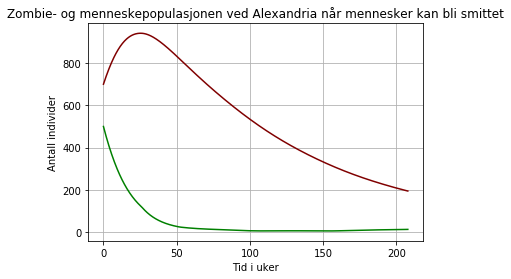

In [8]:
NZ=0.8 #Rate for nye zombier pr. drepte menneske


#Initialbetingelser for tid og zombie populasjonen på nytt
pop[0] = POP
zpop[0] = Z            
tid[0] = 0
sesong = 26

for i in range(N-1):
    if pop[i] < 1:                  #Legger inn if-løkke for å forhindre negativ populasjon      
        pop[i] = 0
    else:
        pop[i] = pop[i]
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
    else:
        ND = ND_S*NightKing
        sesong += etår
        etår = 0
    popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND )*(1-pop[i]/B)- zpop[i]*pop[i]*ZD
    pop[i+1]=pop[i]+popder[i]*dt
    tid[i+1]=tid[i]+dt
    zder[i]=-zpop[i]*RÅ + zpop[i]*pop[i]*ZD*NZ         #Legger til at drepte har en sjanse for å bli ny zombie
    zpop[i+1]=zpop[i]+zder[i]*dt
    
    
    
    
plot(tid,pop,color="green")
plot(tid,zpop,color="maroon")
title("Zombie- og menneskepopulasjonen ved Alexandria når mennesker kan bli smittet")
ylabel("Antall individer")
xlabel("Tid i uker")
grid()
show()

Som vi ser gjør de nye-skapte zombiene at zombie populasjonen ikke dør ut like fort som i tidligere modell. Desverre for menneskene var det ikke like positivt at det kom flere zombier som kunne drepe dem. Menneskepopulasjonen treffer aldri 0, og vil til tross for at det ser dårlig ut, overleve når zombiene råtner vekk. 

Men likevel er det på tide at menneskene får muligheten til å kjempe tilbake:

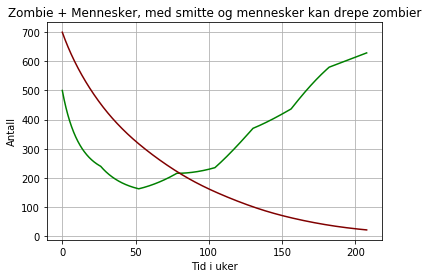

Menneskene overlevde i 207.99999999999855 uker


In [9]:
#NY VARIABEL:
ValyrianSteel =  0.0001       #Raten mennesker kan drepe zombier
overlevelse_m = dt          #Antall uker menneskene har overlevd

#Initialbetingelser for tid og zombie populasjonen på nytt
pop[0] = POP
zpop[0] = Z 
tid[0] = 0
sesong = 26


for i in range(N-1):
    if zpop[i]<1:
        zpop[i]=0
    else:
        zpop[i]=zpop[i]
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
    else:
        ND = ND_S*NightKing
        sesong += etår
        etår = 0
    popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - pop[i]*zpop[i]*ZD
    if pop[i]<1:
        pop[i+1] = 0
    else:
            overlevelse_m += dt
            pop[i+1] = pop[i] + popder[i]*dt
    zder[i]=-zpop[i]*RÅ + zpop[i]*pop[i]*ZD*NZ - pop[i]*zpop[i]*ValyrianSteel
    if zpop[i]<1:
        zpop[i+1]=0
    else:
        zpop[i+1]= zpop[i] + zder[i]*dt
    tid[i+1]=tid[i]+dt
    
    
    
plot(tid,pop,color="green")
plot(tid,zpop,color="maroon")
title("Zombie + Mennesker, med smitte og mennesker kan drepe zombier")
ylabel("Antall")
xlabel("Tid i uker")
grid()
show()

print("Menneskene overlevde i", overlevelse_m, "uker")

Etter at menneskene fikk en måte å slå tilbake mot zombier vokser ikke zombiepopulasjonen så enormt, og dør fortere ut enn i tidligere modell. Samtidig overlever menneskene mye bedre enn i tidligere modell.
Vi har også lagt til en tellevariabel som teller antall uker menneskene har overlevd.

Til nå har vi holdt oss til Alexandria isolert sett, men Alexandria ligger jo i nærheten av Honningvåg (kodenavn: Hilltop) og Kautokeino (kodenavn: Kingdom). Disse byene sender med stor glede og iver ut forsterkninger når Alexandria trenger det. Men for at det ikke skal skje ubegrenset, for Alexandria en cooldown på 10 uker mellom hver forsterkning. Og siden det er litt ubrukelig å sende vekk mennesker for å hjelpe en utdød landsby, sendes det ikke forsterkninger når Alexandrias befolkning er død. 

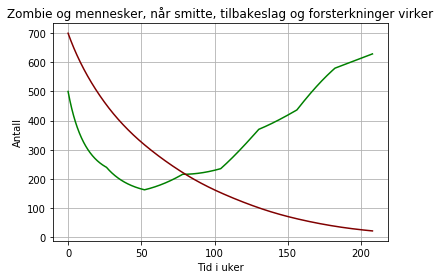

Menneskene overlevde i 207.99999999999855 uker


In [10]:
#Ny betingelse for hjelp
Solo = 0                  #Antall uker til neste hjelp er tilgjengelig
Hjelp=100                 #Antall personer som sendes fra Kautokeino og Honningvåg

#Initialbetingelser for tid og zombie populasjonen på nytt
overlevelse_m = dt
pop[0] = POP
zpop[0] = Z 
tid[0] = 0
sesong = 26


for i in range(N-1):
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
    else:
        ND = ND_S*NightKing
        sesong += etår
        etår = 0

    if 2<pop[i]<20:
        overlevelse_m += dt
        if Solo<1:
            if pop[i]>1:
                popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - zpop[i]*pop[i]*ZD
                pop[i+1]=pop[i]+popder[i]*dt+Hjelp
                Solo = 10
            else:
                print("Vi orker ikke for hauken tar oss")
        else:
            print("Ikke mer hjelp nå, klar dæ sjæl")
    elif pop[i]<2:
        pop[i+1]=0
    else:
        popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - zpop[i]*pop[i]*ZD
        pop[i+1]=pop[i]+popder[i]*dt
        overlevelse_m += dt
        
    tid[i+1]=tid[i]+dt
    zder[i]=-zpop[i]*RÅ + zpop[i]*pop[i]*ZD*NZ - pop[i]*zpop[i]*ValyrianSteel
    if zpop[i]<1:
        zpop[i+1]=0
    else:
        zpop[i+1]=zpop[i] + zder[i]*dt
    Solo -= 1

plot(tid,pop,color="green")
plot(tid,zpop,color="maroon")
title("Zombie og mennesker, når smitte, tilbakeslag og forsterkninger virker")
ylabel("Antall")
xlabel("Tid i uker")
grid()
show()

print("Menneskene overlevde i", overlevelse_m, "uker")

Her skulle vi egentlig kunne se at alexandria mottar støtte fra Kautokeino og Honningvåg når populasjonen synker under 20. Dersom populasjonen er under 1 person (altså enten bare deler av en person som ikke har blitt spist helt opp ennå eller ingen personer i det hele tatt) sendes ingen hjelp.

Men også zombiene kan få forsterkninger i form av grupper med zombier som innvandrer. Hvorvidt en gruppe med zombier ankommer har, i motsetning til menneskenes hjelp, ingenting å si med det nåværende antallet med zombier. Derfor skal vi legge inn en løkke som tilfeldig bestemmer om det skal komme en flok med ny zombier eller ikke. 

Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer hjelp nå, klar dæ sjæl
Ikke mer

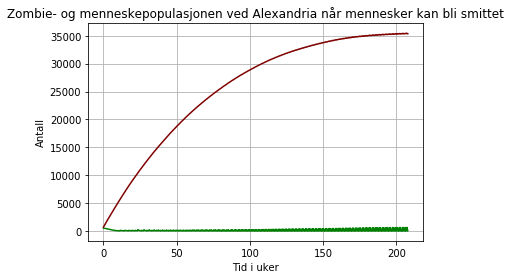

Menneskene overlevde i 207.99999999999855 uker


In [11]:
#Zombiemigrasjon
Zhjelp_min = 50               #Antall zombier som ankommer i flokken minimum
Zhjelp_max = 100              #Antall zombier som ankommer i flokken maksimum
Zhjelp_sjanse = 100            #Sjansen for at flokken dukker opp
a = 0                         #Variabel for å bestemme om flokken dukker opp
Zhjelp = 0                     #Hvor stor flokken som ankommer faktisk er

#Initialbetingelser for tid og zombie populasjonen på nytt
Solo=0
overlevelse_m = dt
pop[0] = POP
zpop[0] = Z 
tid[0] = 0
sesong = 26


for i in range(N-1):
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
    else:
        ND = ND_S*NightKing
        sesong += etår
        etår = 0

    if 2<pop[i]<20:
        overlevelse_m += dt
        if Solo<1:
            if pop[i]>1:
                popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - zpop[i]*pop[i]*ZD
                pop[i+1]=pop[i]+popder[i]*dt+Hjelp
                Solo = 10
            else:
                print("Vi orker ikke for hauken tar oss")
        else:
            print("Ikke mer hjelp nå, klar dæ sjæl")
    elif pop[i]<2:
        pop[i+1]=0
    else:
        popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - zpop[i]*pop[i]*ZD
        pop[i+1]=pop[i]+popder[i]*dt
        overlevelse_m += dt  
    tid[i+1]=tid[i]+dt
    zder[i]=-zpop[i]*RÅ + zpop[i]*pop[i]*ZD*NZ - pop[i]*zpop[i]*ValyrianSteel
    a = randint(0, Zhjelp_sjanse)               #Bestemmer tilfeldig et tall
    if a == 1:
        Zhjelp = randint(Zhjelp_min, Zhjelp_max)  #Dersom tallet er riktig, bestemmes antallet som skal være i flokken
    else:
        Zhjelp = 0                                #Ingen hjelp om a er feil tall
    if zpop[i]<1:
        zpop[i+1]=0
    else:
        zpop[i+1] = zpop[i]+ zder[i]*dt + Hjelp   #Legger til den eventuelle hjelpen
    Solo -= 1


plot(tid,pop,color="green")
plot(tid,zpop,color="maroon")
title("Zombie- og menneskepopulasjonen ved Alexandria når mennesker kan bli smittet")
ylabel("Antall")
xlabel("Tid i uker")
grid()
show()
print("Menneskene overlevde i", overlevelse_m, "uker")

Her får zombiene mye tilfeldig hjelp og dette fører til at menneskene såvidt overlever takket være forsterkninger fra Honningsvåg og Kautokeino. (dette kan man se ettersom det ikke er noen "Vi orker ikke for hauken tar oss" melding.)

Slik modellen er nå er menneskene nøyaktig like flinke til å drepe zombier i uke 200, som i uke 1. Dette er litt usannsynlig, og vi lager derfor en ny modell der menneskene blir flinkere og flinkere til å drepe zombier. I tillegg antar vi at det kommer flere zombie flokker om sommeren, ettersom varmen gjør det enklere for dem å bevege seg nordover. 

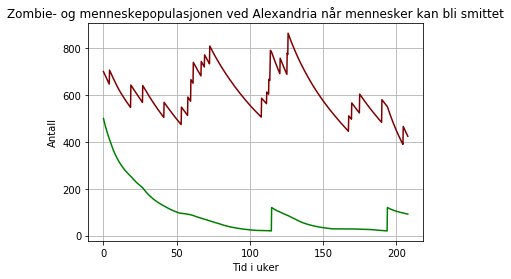

Menneskene overlevde i 207.99999999999855 uker
Valyrian er 0.000292


In [12]:
#Tellevariabel for antall uker
telle=0

#Initialbetingelser for tid og zombie populasjonen på nytt
overlevelse_m = dt
Solo = 0
pop[0] = POP
zpop[0] = Z 
tid[0] = 0
sesong = 26
ValyrianSteel = 0.0001


for i in range(N-1):
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
        Zhjelp_sjanse = 25
    else:
        ND = ND_S*NightKing
        sesong += etår
        etår = 0
        Zhjelp_sjanse = 100
    if 2<pop[i]<20:
        overlevelse_m += dt
        if Solo<1:
            if pop[i]>1:
                popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - zpop[i]*pop[i]*ZD
                pop[i+1]=pop[i]+popder[i]*dt+Hjelp
                Solo = 10
            else:
                print("Vi orker ikke for hauken tar oss")
        else:
            print("Ikke mer hjelp nå, klar dæ sjæl")
    elif pop[i]<2:
        pop[i+1]=0
    else:
        popder[i] = (pop[i]*F + pop[i]*I - pop[i]*ND)*(1-(pop[i]/B)) - zpop[i]*pop[i]*ZD
        pop[i+1] = pop[i]+popder[i]*dt
        overlevelse_m += dt  
    tid[i+1]=tid[i]+dt
    zder[i] = -zpop[i]*RÅ + zpop[i]*pop[i]*ZD*NZ - pop[i]*zpop[i]*ValyrianSteel
    a = randint(0, Zhjelp_sjanse)               #Bestemmer tilfeldig et tall
    if a == 1:
        Zhjelp = randint(Zhjelp_min, Zhjelp_max)  #Dersom tallet er riktig, bestemmes antallet som skal være i flokken
    else:
        Zhjelp = 0                                #Ingen hjelp om a er feil tall
    if zpop[i]<1:
        zpop[i+1]=0
    else:
        zpop[i+1] = zpop[i]+ zder[i]*dt + Zhjelp   #Legger til den eventuelle hjelpen
    Solo -= 1
    
    telle += dt                                   #telle teller antall uker som har gått
    if telle>1:                                 
        ValyrianSteel += randint(-2, 5)*0.000001
        telle -= 1
    else:
        ValyrianSteel = ValyrianSteel


plot(tid,pop,color="green")
plot(tid,zpop,color="maroon")
title("Zombie- og menneskepopulasjonen ved Alexandria når mennesker kan bli smittet")
ylabel("Antall")
xlabel("Tid i uker")
grid()
show()
print("Menneskene overlevde i", overlevelse_m, "uker")
print("Valyrian er", ValyrianSteel)


Nå er det såklart veldig tilfeldig hvordan grafen ser ut, men mest sannynlig så ligner det noe slik at menneskene klarer å overleve, og zombiene holder seg oppe, men synker sakte. Faktorene som kan være med å påvirke er:

*Hvor ofte og hvor mange som er i de nye zombie flokkene

*Hvor tilpasningsdyktige menneskene er, og blir flinkere til å drepe zombier. 

Dersom befolkningen i Alexandria er flinke til å tilpasse seg, så overlever de bedre. Akkurat det høres litt kjent ut, men må nok en tur til Galapagos før det ringer noen bjelle. 

Selv om modellen består av mange forskjellige variabler er den fremdeles ikke helt feilfri. Det er utallige flere faktorer som kan spille inn på populasjonen. For eksempel så kan det hende at Alexandria selv må sende ut hjelp. Eller kanskje det kommer en gruppe som forsøker å ta over Alexandria. Kanskje styreformen i Alexandria blir ineffektiv hvis lederen dør?

Målet vårt var jo å forsøke å lage en realistisk modell, hvor både zombiene og menneskene overlevde lengst mulig. Vi føler vi har klart å få til dette. Såklart er det vanskelig å vite hva de ulike variablene ville vært i "virkeligheten", så det er fullt mulig at en zombieapokalypse hadde sett helt annerledes ut. 



For moro skyld så tester vi å kjøre modellen i 10 år. Overlever menneskene til slutt? Dør Zombiene ut? Hotell? Trivago, vi får se:

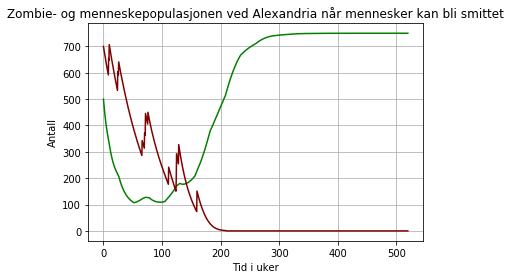

Menneskene overlevde i 519.999999999993 uker
Valyrian er 0.0006629999999999988


In [13]:

TID = 520
N=1000        
dt=TID/N 

#Initialbetingelser for tid og zombie populasjonen på nytt
overlevelse_m = dt
Solo = 0
pop[0] = POP
zpop[0] = Z 
tid[0] = 0
sesong = 26
ValyrianSteel = 0.0001
telle=0


for i in range(N-1):
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
        Zhjelp_sjanse = 25
    else:
        ND = ND_S*NightKing
        sesong += etår
        etår = 0
        Zhjelp_sjanse = 100
    if 2<pop[i]<20:
        overlevelse_m += dt
        if Solo<1:
            if pop[i]>1:
                popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - zpop[i]*pop[i]*ZD
                pop[i+1]=pop[i]+popder[i]*dt+Hjelp
                Solo = 10
            else:
                print("Vi orker ikke for hauken tar oss")
        else:
            print("Ikke mer hjelp nå, klar dæ sjæl")
    elif pop[i]<2:
        pop[i+1]=0
    else:
        popder[i] = (pop[i]*F + pop[i]*I - pop[i]*ND)*(1-(pop[i]/B)) - zpop[i]*pop[i]*ZD
        pop[i+1] = pop[i]+popder[i]*dt
        overlevelse_m += dt  
    tid[i+1]=tid[i]+dt
    zder[i] = -zpop[i]*RÅ + zpop[i]*pop[i]*ZD*NZ - pop[i]*zpop[i]*ValyrianSteel
    a = randint(0, Zhjelp_sjanse)               #Bestemmer tilfeldig et tall
    if a == 1:
        Zhjelp = randint(Zhjelp_min, Zhjelp_max)  #Dersom tallet er riktig, bestemmes antallet som skal være i flokken
    else:
        Zhjelp = 0                                #Ingen hjelp om a er feil tall
    if zpop[i]<1:
        zpop[i+1]=0
    else:
        zpop[i+1] = zpop[i]+ zder[i]*dt + Zhjelp   #Legger til den eventuelle hjelpen
    Solo -= 1
    
    telle += dt                                   #telle teller antall uker som har gått
    if telle>1:                                 
        ValyrianSteel += randint(-2, 5)*0.000001
        telle -= 1
    else:
        ValyrianSteel = ValyrianSteel


plot(tid,pop,color="green")
plot(tid,zpop,color="maroon")
title("Zombie- og menneskepopulasjonen ved Alexandria når mennesker kan bli smittet")
ylabel("Antall")
xlabel("Tid i uker")
grid()
show()
print("Menneskene overlevde i", overlevelse_m, "uker")
print("Valyrian er", ValyrianSteel)


Nå er det som sagt veldig vanskelig å tippe på hvordan grafen ser ut for hver gjennomkjøring, men mest sannsynlig overlever menneskene og oppnår til slutt bæreevne. Zombiene dør sakt men sikkert ut ettersom de råtner over tid. Grunnen til at dette skjer flesteparten av gangene er at menneskenes evne til å drepe zombier øker. Ettersom det ikke er noen grense for hvor høy denne evnen kan være, vil den bli altfor stor etterhvert. Dette kan enkelt fikses ved å sette en grense:


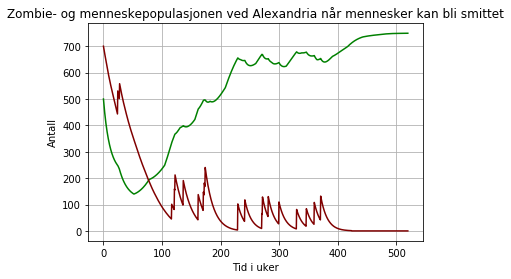

Menneskene overlevde i 519.999999999993 uker
Valyrian er 0.00020099999999999982


In [14]:
#Initialbetingelser for tid og zombie populasjonen på nytt
overlevelse_m = dt
Solo = 0
pop[0] = POP
zpop[0] = Z 
tid[0] = 0
sesong = 26
ValyrianSteel = 0.0001
telle=0
StandardVS = 0.000001


for i in range(N-1):
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
        Zhjelp_sjanse = 25
    else:
        ND = ND_S*NightKing
        sesong += etår
        etår = 0
        Zhjelp_sjanse = 100
    if 2<pop[i]<20:
        overlevelse_m += dt
        if Solo<1:
            if pop[i]>1:
                popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - zpop[i]*pop[i]*ZD
                pop[i+1]=pop[i]+popder[i]*dt+Hjelp
                Solo = 10
            else:
                print("Vi orker ikke for hauken tar oss")
        else:
            print("Ikke mer hjelp nå, klar dæ sjæl")
    elif pop[i]<2:
        pop[i+1]=0
    else:
        popder[i] = (pop[i]*F + pop[i]*I - pop[i]*ND)*(1-(pop[i]/B)) - zpop[i]*pop[i]*ZD
        pop[i+1] = pop[i]+popder[i]*dt
        overlevelse_m += dt  
    tid[i+1]=tid[i]+dt
    zder[i] = -zpop[i]*RÅ + zpop[i]*pop[i]*ZD*NZ - pop[i]*zpop[i]*ValyrianSteel
    a = randint(0, Zhjelp_sjanse)               
    if a == 1:
        Zhjelp = randint(Zhjelp_min, Zhjelp_max) 
    else:
        Zhjelp = 0                            
    if zpop[i]<1:
        zpop[i+1]=0
    else:
        zpop[i+1] = zpop[i]+ zder[i]*dt + Zhjelp  
    Solo -= 1
    
    telle += dt                                   
    if telle>1:
        if ValyrianSteel > 0.0002:
            StandardVS = 0
        else:
            StandardVS = StandardVS
            ValyrianSteel += randint(-2, 5)*StandardVS
        telle -= 1
    else:
        ValyrianSteel = ValyrianSteel


plot(tid,pop,color="green")
plot(tid,zpop,color="maroon")
title("Zombie- og menneskepopulasjonen ved Alexandria når mennesker kan bli smittet")
ylabel("Antall")
xlabel("Tid i uker")
grid()
show()
print("Menneskene overlevde i", overlevelse_m, "uker")
print("Valyrian er", ValyrianSteel)

At det ble satt en grense for hvor tilpasningsdyktig det er mulig at menneskene kan bli gjorde at zombiene muligens overlever litt lenger (Tilfeldig). 

Hensikten med prosjektet vårt var å se hvordan en tenkt populasjon vil utvikle seg gjennom en zombieapokalypse. Resultatene som vi får som følge av de ulike variablene våre forteller at for vårt scenario vil zombieapokalypsen til slutt ende, hver eneste gang. Hvorvidt menneskene overlever er tilfeldig, men the odds are almost always in their favour. Vi ønsket å lage en modell der både menneskene og zombiene klarer å overleve over lengre tid, muligens til og med få sykliske svingninger, men vår modell ender ofte med at zombiene dør. Den viser også at forholdet mellom zombier og mennesker ikke fører til sykliske svingninger. 
Prosjektet har også vist hvordan ulike faktorer kan være med på å påvirke en populasjon, samt hvor mange faktorer som finnes. Å skape en modell som er en helt perfekt representasjon av virkeligheten vil være vanskelig, om ikke mulig. Samtidig er jo det akkurat hva en modell er: En forenklet versjon av virkeligheten. 



Som en siste sidenote: Dersom menneskene ikke blir noe som helst bedre på å drepe zombier, viser modellen tendenser til sykliske svingninger (dersom de tilfeldige variablene treffer riktig). Dette er jo ikke like realistisk ettersom mennesker er smartere enn zombier, og vil klare å finne en måte å overliste dem til slutt. Men igjen, for moro skyld så prøver vi:

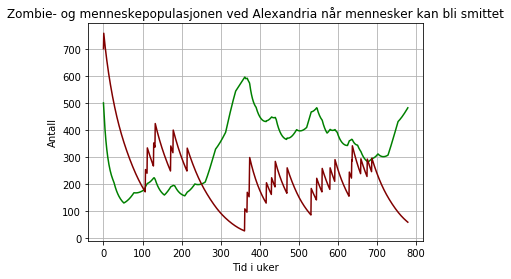

Menneskene overlevde i 779.999999999982 uker
Valyrian er 0.0001


In [30]:
#Initialbetingelser for tid og zombie populasjonen på nytt
TID= 52*15      #18 år i uker           
N=1000             
dt=TID/N



overlevelse_m = dt
Solo = 0
pop[0] = POP
zpop[0] = Z 
tid[0] = 0
sesong = 26
ValyrianSteel = 0.0001
telle=0
StandardVS = 0.000001


for i in range(N-1):
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
        Zhjelp_sjanse = 25
    else:
        ND = ND_S*NightKing
        sesong += etår
        etår = 0
        Zhjelp_sjanse = 100
    if 2<pop[i]<20:
        overlevelse_m += dt
        if Solo<1:
            if pop[i]>1:
                popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - zpop[i]*pop[i]*ZD
                pop[i+1]=pop[i]+popder[i]*dt+Hjelp
                Solo = 10
            else:
                print("Vi orker ikke for hauken tar oss")
        else:
            print("Ikke mer hjelp nå, klar dæ sjæl")
    elif pop[i]<2:
        pop[i+1]=0
    else:
        popder[i] = (pop[i]*F + pop[i]*I - pop[i]*ND)*(1-(pop[i]/B)) - zpop[i]*pop[i]*ZD
        pop[i+1] = pop[i]+popder[i]*dt
        overlevelse_m += dt  
    tid[i+1]=tid[i]+dt
    zder[i] = -zpop[i]*RÅ + zpop[i]*pop[i]*ZD*NZ - pop[i]*zpop[i]*ValyrianSteel
    a = randint(0, Zhjelp_sjanse)               
    if a == 1:
        Zhjelp = randint(Zhjelp_min, Zhjelp_max)  
    else:
        Zhjelp = 0                                
    if zpop[i]<1:
        zpop[i+1]=0
    else:
        zpop[i+1] = zpop[i]+ zder[i]*dt + Zhjelp   
    Solo -= 1
    


plot(tid,pop,color="green")
plot(tid,zpop,color="maroon")
title("Zombie- og menneskepopulasjonen ved Alexandria når mennesker kan bli smittet")
ylabel("Antall")
xlabel("Tid i uker")
grid()
show()
print("Menneskene overlevde i", overlevelse_m, "uker")
print("Valyrian er", ValyrianSteel)